### K-Means Clustering

1.machine learning model to create group of mall customers based on their annual income and spending score for a given dataset


In [1]:
# import libraries
# for basic operations
import numpy as np
import pandas as pd

# for data visualization
from matplotlib import pyplot as plt
import seaborn as sns
import plotly as py

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import v_measure_score

In [2]:
# reading the data and finding the computation time for uploading the dataset

%time data =pd.read_csv('Dataset/Mall_Customers.csv')

# getting to know the shape of the data
print(data.shape)

CPU times: user 5.3 ms, sys: 318 µs, total: 5.61 ms
Wall time: 123 ms
(200, 5)


In [3]:
# checking the head of the data

data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# describing the data

data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# checking if the dataset contains any NULL values

data.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [1]:
# # Data Visualization
# # plotting a kdep plot

# plt.style.use('seaborn-deep')
# plt.rcParams['figure.figsize'] = (15, 8)
# g = sns.PairGrid(data[['Genre', 'Age', 'Annual Income (k$)','Spending Score (1-100)']])
# g.map_diag(sns.kdeplot)
# g.map_offdiag(sns.kdeplot, n_levels=8);

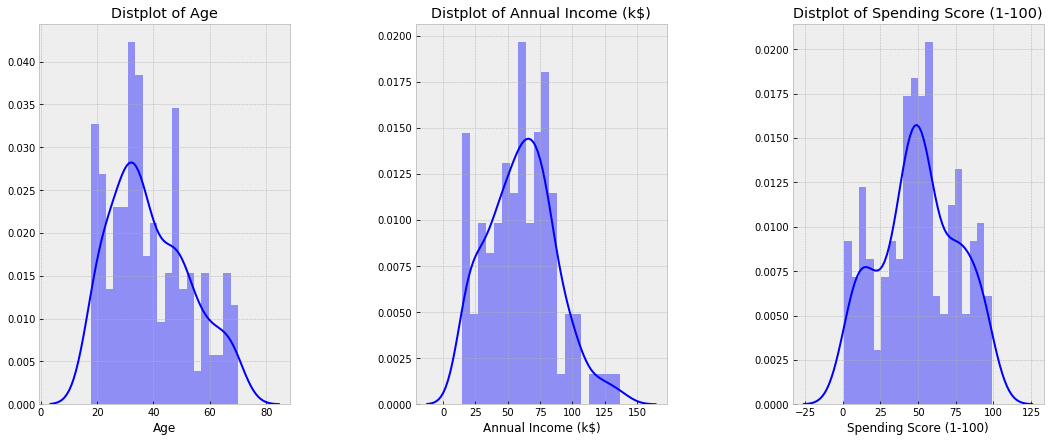

In [7]:
# Distribution Plots

plt.style.use('bmh')

plt.figure(1 , figsize = (18 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] ,color = 'blue', bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

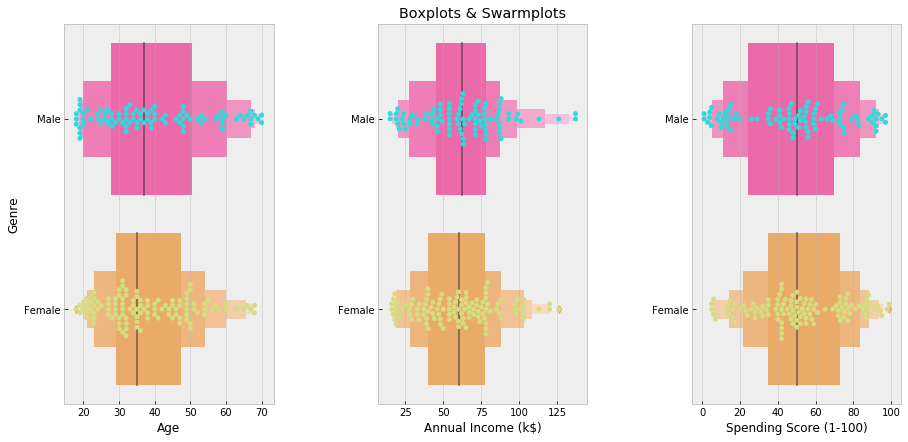

In [8]:
# Swarm and Violin Plots


plt.style.use('seaborn-deep')
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxenplot(x = cols , y = 'Genre' , data = data , palette = 'spring')
    sns.swarmplot(x = cols , y = 'Genre' , data = data, palette = 'rainbow')
    plt.ylabel('Genre' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()


In [9]:
# counting the unique value count in the gender category

data['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

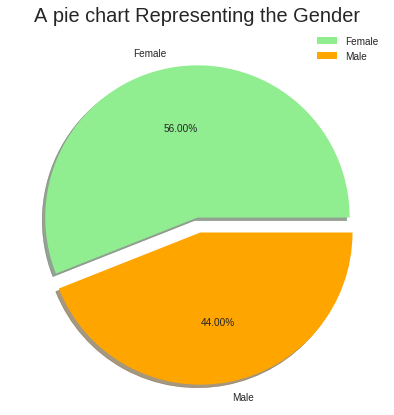

In [10]:
# drawing a pie chart to represent the ratio of male and female customers in the mall

labels = ['Female', 'Male']
size = [112, 88]
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('A pie chart Representing the Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Age Variations')

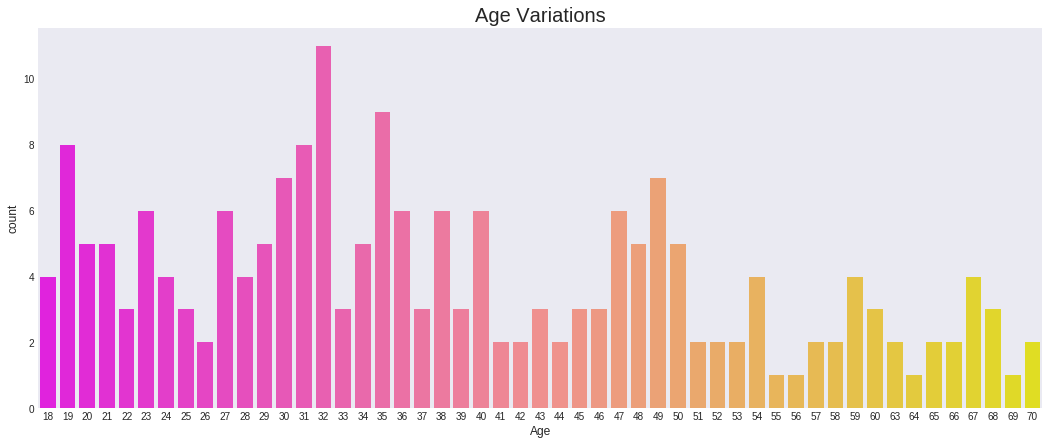

In [11]:
# checking the unique value counts for the age attribute for the customers
# also, plotting a bar graph

plt.rcParams['figure.figsize'] = (18, 7)
plt.style.use('seaborn-dark-palette')
sns.countplot(data['Age'], palette = 'spring')
plt.title('Age Variations', fontsize = 20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]),
 <a list of 84 Text xticklabel objects>)

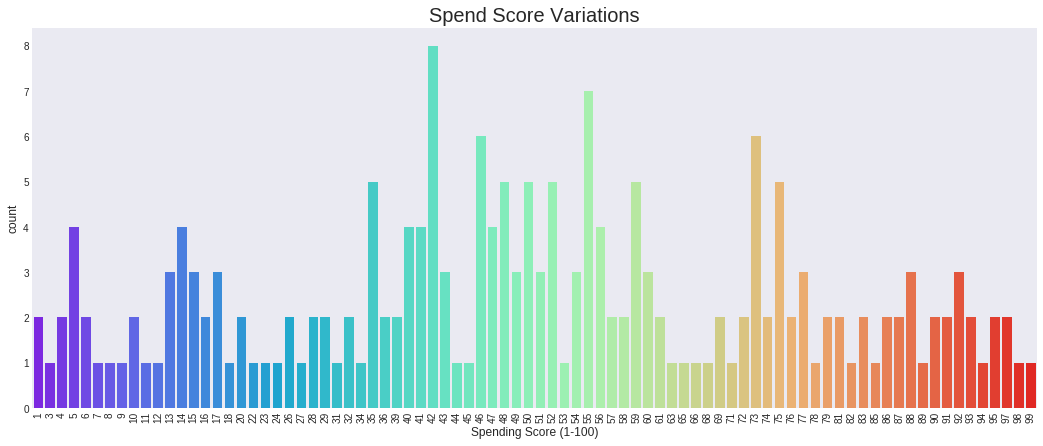

In [12]:
# checking the spendscore

plt.rcParams['figure.figsize'] = (18, 7)
plt.style.use('seaborn-deep')
sns.countplot(data['Spending Score (1-100)'], palette = 'rainbow')
plt.title('Spend Score Variations', fontsize = 20)
plt.xticks(rotation = 90)

In [2]:
# # plotting a pairplot

# plt.style.use('seaborn-deep')
# sns.pairplot(data)
# plt.title('Pair plot for the Data', fontsize = 20)

In [14]:
# making a data to be clustered (it should be only two-dimensional)

# lets say it x
x = data.iloc[:, [3, 4]].values

print(x.shape)

(200, 2)


# K-Means Clustering and using the elbow method


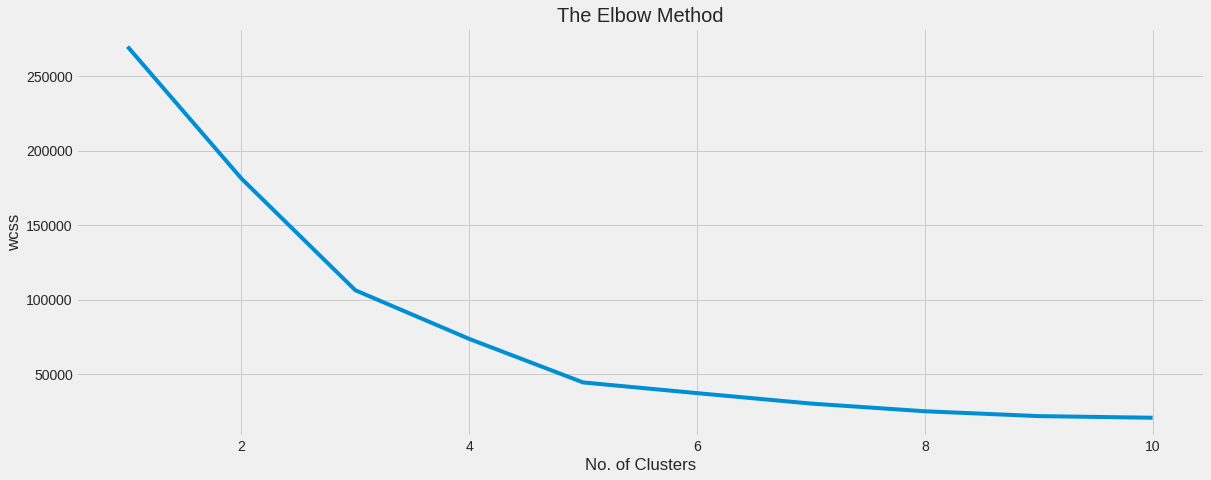

In [15]:
# The Elbow Method
# It is used to find the Optimal no. of Clusters in any Dataset

# applying kmeans clustering and using the elbow method

# the no. of clusters are where there deviations start decreasing

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)
  
plt.style.use('fivethirtyeight')
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

# plotting the clusters

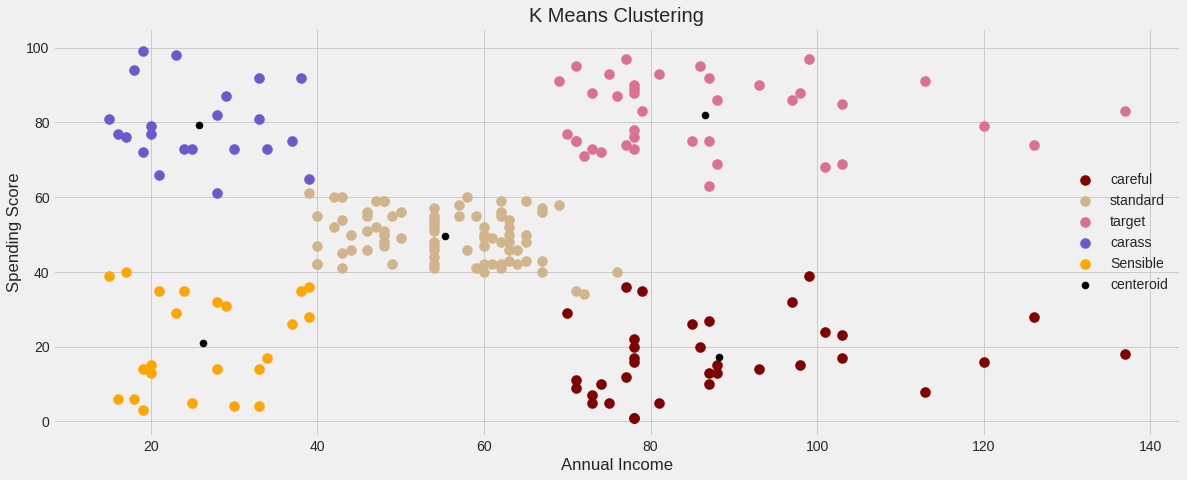

In [16]:
# plotting the clusters

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.style.use('fivethirtyeight')
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'maroon', label = 'careful')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'tan', label = 'standard')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'palevioletred', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'slateblue', label = 'carass')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'Sensible')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()